# CAS_Project - Contribution HUC

Goal: Regression Covid-Cases per 100'000 / GDP AND Regression Covid-Death per 100'000 / GDP

Solution: 
Regression for a single country and all countries combined.

---

indices 

- Bombay Stock Echxange Sensitivity Index Composite --> India
- BVSP Composite -> Brasil
- FCHI Composite -> France
- GSPC Composite -> USA
- GSPTE Composite -> Canada
- N225 Composite -> Japan
- SSEC Composite -> China (Shanghai)
- DAX Composite -> Germany
- FTSEMIB Composite -> Italy
- FTSE Composite -> UK


---

Covid-Data:
Countries are in rows, indexed by the date. To have a more handy data frame: change data per country as a colomn!



Used Modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from numpy import cov
#from urllib.request import urlopen
#from sklearn import datasets



## Import Data

### Covid Data


In [2]:
# csv der Coviddaten einlesen

df_Covid19 = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/COVID-19-geographic-disbtribution-worldwide.csv') # https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases
df_Covid19.head(3) #test

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,11/10/2020,11,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.251257
1,10/10/2020,10,10,2020,10,1,Afghanistan,AF,AFG,38041757.0,Asia,1.343261
2,09/10/2020,9,10,2020,77,2,Afghanistan,AF,AFG,38041757.0,Asia,1.332746


In [3]:
#basic information
df_Covid19.shape

(48316, 12)

In [4]:
#basic information
df_Covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48316 entries, 0 to 48315
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     48316 non-null  object 
 1   day                                                         48316 non-null  int64  
 2   month                                                       48316 non-null  int64  
 3   year                                                        48316 non-null  int64  
 4   cases                                                       48316 non-null  int64  
 5   deaths                                                      48316 non-null  int64  
 6   countriesAndTerritories                                     48316 non-null  object 
 7   geoId                                                       48105 non-null  object 
 

In [5]:
# identify need for cleaning up the Covid Data

df_Covid19_isNaN = df_Covid19.isnull()


row_has_NaN = df_Covid19_isNaN.any(axis=1)
rows_with_NaN = df_Covid19[row_has_NaN]
rows_with_NaN


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
263,12/01/2020,12,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
264,11/01/2020,11,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
265,10/01/2020,10,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
266,09/01/2020,9,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
267,08/01/2020,8,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
48311,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
48312,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
48313,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
48314,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [6]:
# renaming for better readability

df_Covid19=df_Covid19.rename(columns={'dateRep': 'Date', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': 'cases(14days)/100k'})
df_Covid19['Date'] = pd.to_datetime(df_Covid19['Date'],dayfirst=True) # necessary? When date leq 12 -> display of date (combination month, day) is incorrect... fixed
df_Covid19.head(3)

,Date,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,cases(14days)/100k
0,2020-10-11,11,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.251257
1,2020-10-10,10,10,2020,10,1,Afghanistan,AF,AFG,38041757.0,Asia,1.343261
2,2020-10-09,9,10,2020,77,2,Afghanistan,AF,AFG,38041757.0,Asia,1.332746


In [7]:
#Select rows for selected countries 

df_Covid_Selection = df_Covid19[df_Covid19['countriesAndTerritories'].isin(['India', 'Brazil','France','United_States_of_America','Canada','Japan','China','Germany', 'Italy', 'United_Kingdom'])]
df_Covid_Selection.shape

(2859, 12)

In [8]:
# Selecting the relevant coloumns (i.e. date, cases, deaths, Cummulative Nuber per 100k).

df_Covid_Selection=df_Covid_Selection[['Date','cases','deaths','countriesAndTerritories', 'cases(14days)/100k']]

In [9]:
# Change the NaN in Cases per 100k to 0 for further computing. As the original table does have NaN for the 14day period if there have not been cases for 14 days...

df_Covid_Selection['cases(14days)/100k'] = df_Covid_Selection['cases(14days)/100k'].fillna(0) 

In [10]:
#test
df_Covid_Selection.head(3)

,Date,cases,deaths,countriesAndTerritories,cases(14days)/100k
6263,2020-10-11,26749,559,Brazil,172.777461
6264,2020-10-10,27444,682,Brazil,173.549318
6265,2020-10-09,27750,729,Brazil,175.665882


In [11]:
df_Covid_Selection.tail(3)

,Date,cases,deaths,countriesAndTerritories,cases(14days)/100k
46433,2020-01-02,0,0,United_States_of_America,0.0
46434,2020-01-01,0,0,United_States_of_America,0.0
46435,2019-12-31,0,0,United_States_of_America,0.0


In [12]:
# Case: Brazil. Select rows and colomns. Rename data frame and colomn names accordingly 

df_Covid_Brazil = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Brazil'])]
df_Covid_Brazil = df_Covid_Brazil[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Brazil = df_Covid_Brazil.rename(columns={'cases': 'cases_Brazil', 'deaths': 'deaths_Brazil', 'cases(14days)/100k' :'cases(14days)/100k_Brazil'})

df_Covid_Brazil.head(3)

,Date,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil
6263,2020-10-11,26749,559,172.777461
6264,2020-10-10,27444,682,173.549318
6265,2020-10-09,27750,729,175.665882


In [13]:
# Apply for all countries. Select rows and colomns. Rename data frame and colomn names accordingly

df_Covid_Canada = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Canada'])]
df_Covid_Canada = df_Covid_Canada[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Canada = df_Covid_Canada.rename(columns={'cases': 'cases_Canada', 'deaths': 'deaths_Canada', 'cases(14days)/100k' :'cases(14days)/100k_Canada'})

df_Covid_China = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['China'])]
df_Covid_China = df_Covid_China[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_China = df_Covid_China.rename(columns={'cases': 'cases_China', 'deaths': 'deaths_China', 'cases(14days)/100k' :'cases(14days)/100k_China'})

df_Covid_France = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['France'])]
df_Covid_France = df_Covid_France[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_France = df_Covid_France.rename(columns={'cases': 'cases_France', 'deaths': 'deaths_France', 'cases(14days)/100k' :'cases(14days)/100k_France'})

df_Covid_Germany = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Germany'])]
df_Covid_Germany =df_Covid_Germany[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Germany = df_Covid_Germany.rename(columns={'cases': 'cases_Germany', 'deaths': 'deaths_Germany', 'cases(14days)/100k' :'cases(14days)/100k_Germany'})

df_Covid_India = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['India'])]
df_Covid_India = df_Covid_India[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_India = df_Covid_India.rename(columns={'cases': 'cases_India', 'deaths': 'deaths_India', 'cases(14days)/100k' :'cases(14days)/100k_India'})

df_Covid_Japan = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Japan'])]
df_Covid_Japan = df_Covid_Japan[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Japan = df_Covid_Japan.rename(columns={'cases': 'cases_Japan', 'deaths': 'deaths_Japan', 'cases(14days)/100k' :'cases(14days)/100k_Japan'})

df_Covid_USA = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['United_States_of_America'])]
df_Covid_USA = df_Covid_USA[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_USA = df_Covid_USA.rename(columns={'cases': 'cases_USA', 'deaths': 'deaths_USA', 'cases(14days)/100k' :'cases(14days)/100k_USA'})

df_Covid_Italy = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Italy'])]
df_Covid_Italy = df_Covid_Italy[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Italy = df_Covid_Italy.rename(columns={'cases': 'cases_Italy', 'deaths': 'deaths_Italy', 'cases(14days)/100k' :'cases(14days)/100k_Italy'})

df_Covid_UK = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['United_Kingdom'])]
df_Covid_UK = df_Covid_UK[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_UK = df_Covid_UK.rename(columns={'cases': 'cases_UK', 'deaths': 'deaths_UK', 'cases(14days)/100k' :'cases(14days)/100k_UK'})


# Indices

In [14]:
#csv der Indices einlesen
df_BSESN = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^BSESN.csv') # BSESN Bombay Stock Ehange Sensitivity Index Composite --> India
df_BSESN['Name']='BSESN' 

df_BVSP = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^BVSP.csv') # BVSP Composite -> Brasil
df_BVSP['Name']='BVSP'

df_FCHI = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^FCHI.csv') # FCHI Composite -> France
df_FCHI['Name']='FCHI'

df_GSPC = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^GSPC.csv') # GSPC Composite -> USA
df_GSPC['Name']='GSPC'

df_GSPTE = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^GSPTSE.csv') # GSPTE Composite -> Canada
df_GSPTE['Name']='GSPTE'

df_N225 = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^N225.csv') # N225 Composite -> Japan
df_N225['Name']='N225'

df_SSEC = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^SSEC.csv') # SSEC Composite -> China (Shanghai)
df_SSEC['Name']='SSEC'

df_DAX = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^GDAXI.csv') # DAX Composite -> Germany
df_DAX['Name']='DAX'

df_FTSEMIB = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^FTSEMIB.csv') # FTSEMIB Composite -> Italy
df_FTSEMIB['Name']='FTSEMIB'

df_FTSE = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^FTSE.csv') # FTSE Composite -> UK
df_FTSE['Name']='FTSE'


In [15]:
# Gather some information on the data frames
df_DAX.shape

(252, 8)

In [16]:
df_DAX.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Name
249,2020-09-28,12673.730469,12873.400391,12660.150391,12870.870117,12870.870117,72431000,DAX
250,2020-09-29,12817.790039,12859.139648,12738.299805,12825.820313,12825.820313,49842200,DAX
251,2020-09-30,12754.769531,12869.959961,12698.419922,12760.730469,12760.730469,70303900,DAX


In [17]:
#Select coloumns for DAX and rename the data frame and colomn names

df_DAX=df_DAX.rename(columns={'Open': 'Open_DAX', 'High': 'High_DAX', 'Low': 'Low_DAX', 'Close':'Close_DAX', 'Adj Close': 'Adj Close_DAX', 'Volume': 'Volume_DAX'})

In [18]:
# Check if rows have been dropped
df_DAX  = df_DAX[['Date','Adj Close_DAX']]
df_DAX.shape

(252, 2)

In [19]:
# Change format of "Date" and set Date as Index

df_DAX['Date'] = pd.to_datetime(df_DAX['Date'])
df_DAX.set_index('Date').sort_index()

,Adj Close_DAX
Date,
2019-10-01,12263.830078
2019-10-02,11925.250000
2019-10-04,12012.809570
2019-10-07,12097.429688
2019-10-08,11970.200195
...,...
2020-09-24,12606.570313
2020-09-25,12469.200195
2020-09-28,12870.870117


In [20]:
#Apply for all indices

df_BSESN=df_BSESN.rename(columns={'Open': 'Open_BSESN', 'High': 'High_BSESN', 'Low': 'Low_BSESN', 'Close':'Close_BSESN', 'Adj Close': 'Adj Close_BSESN', 'Volume': 'Volume_BSESN'})
df_BSESN  = df_BSESN[['Date','Adj Close_BSESN']]
df_BSESN['Date'] = pd.to_datetime(df_BSESN['Date'])
df_BSESN.set_index('Date').sort_index()


,Adj Close_BSESN
Date,
2019-10-01,38305.410156
2019-10-03,38106.871094
2019-10-04,37673.308594
2019-10-07,37531.980469
2019-10-09,38177.949219
...,...
2020-09-24,36553.601563
2020-09-25,37388.660156
2020-09-28,37981.628906


In [21]:
df_BVSP=df_BVSP.rename(columns={'Open': 'Open_BVSP', 'High': 'High_BVSP', 'Low': 'Low_BVSP', 'Close':'Close_BVSP', 'Adj Close': 'Adj Close_BVSP', 'Volume': 'Volume_BVSP'})
df_BVSP  = df_BVSP[['Date','Adj Close_BVSP']]
df_BVSP['Date'] = pd.to_datetime(df_BVSP['Date'])
df_BVSP.set_index('Date').sort_index()

,Adj Close_BVSP
Date,
2019-10-01,104053.0
2019-10-02,101031.0
2019-10-03,101516.0
2019-10-04,102551.0
2019-10-07,100573.0
...,...
2020-09-24,97012.0
2020-09-25,96999.0
2020-09-28,94666.0


In [22]:
df_FCHI=df_FCHI.rename(columns={'Open': 'Open_FCHI', 'High': 'High_FCHI', 'Low': 'Low_FCHI', 'Close':'Close_FCHI', 'Adj Close': 'Adj Close_FCHI', 'Volume': 'Volume_FCHI'})
df_FCHI  = df_FCHI[['Date','Adj Close_FCHI']]
df_FCHI['Date'] = pd.to_datetime(df_FCHI['Date'])
df_FCHI.set_index('Date').sort_index()


,Adj Close_FCHI
Date,
2019-10-01,5597.629883
2019-10-02,5422.770020
2019-10-03,5438.770020
2019-10-04,5488.319824
2019-10-07,5521.609863
...,...
2020-09-24,4762.620117
2020-09-25,4729.660156
2020-09-28,4843.270020


In [23]:
df_GSPC=df_GSPC.rename(columns={'Open': 'Open_GSPC', 'High': 'High_GSPC', 'Low': 'Low_GSPC', 'Close':'Close_GSPC', 'Adj Close': 'Adj Close_GSPC', 'Volume': 'Volume_GSPC'})
df_GSPC  = df_GSPC[['Date','Adj Close_GSPC']]
df_GSPC['Date'] = pd.to_datetime(df_GSPC['Date'])
df_GSPC.set_index('Date').sort_index()

,Adj Close_GSPC
Date,
2019-10-01,2940.250000
2019-10-02,2887.610107
2019-10-03,2910.629883
2019-10-04,2952.010010
2019-10-07,2938.790039
...,...
2020-09-24,3246.590088
2020-09-25,3298.459961
2020-09-28,3351.600098


In [24]:
df_GSPTE=df_GSPTE.rename(columns={'Open': 'Open_GSPTE', 'High': 'High_GSPTE', 'Low': 'Low_GSPTE', 'Close':'Close_GSPTE', 'Adj Close': 'Adj Close_GSPTE', 'Volume': 'Volume_GSPTE'})
df_GSPTE  = df_GSPTE[['Date','Adj Close_GSPTE']]
df_GSPTE['Date'] = pd.to_datetime(df_GSPTE['Date'])
df_GSPTE.set_index('Date').sort_index()

,Adj Close_GSPTE
Date,
2019-10-01,16447.699219
2019-10-02,16311.000000
2019-10-03,16369.000000
2019-10-04,16449.400391
2019-10-07,16421.800781
...,...
2020-09-24,15912.299805
2020-09-25,16065.400391
2020-09-28,16242.799805


In [25]:
df_N225=df_N225.rename(columns={'Open': 'Open_N225', 'High': 'High_N225', 'Low': 'Low_N225', 'Close':'Close_N225', 'Adj Close': 'Adj Close_N225', 'Volume': 'Volume_N225'})
df_N225  = df_N225[['Date','Adj Close_N225']]
df_N225['Date'] = pd.to_datetime(df_N225['Date'])
df_N225.set_index('Date').sort_index()

,Adj Close_N225
Date,
2019-10-01,21885.240234
2019-10-02,21778.609375
2019-10-03,21341.740234
2019-10-04,21410.199219
2019-10-07,21375.250000
...,...
2020-09-25,23204.619141
2020-09-28,23511.619141
2020-09-29,23539.099609


In [26]:
df_FTSEMIB = df_FTSEMIB.rename(columns={'Open': 'Open_FTSEMIB', 'High': 'High_FTSEMIB', 'Low': 'Low_FTSEMIB', 'Close':'Close_FTSEMIB', 'Adj Close':'Adj Close_FTSEMIB', 'Volume': 'Volume_FTSEMIB'})
df_FTSEMIB  = df_FTSEMIB[['Date','Adj Close_FTSEMIB']]
df_FTSEMIB['Date'] = pd.to_datetime(df_FTSEMIB['Date'])
df_FTSEMIB.set_index('Date').sort_index()
#### despite multiple tries I always receive the from 2019-07-16 onward... drop the lines!

,Adj Close_FTSEMIB
Date,
2019-07-26,21838.0
2019-07-29,21709.0
2019-07-30,21278.0
2019-07-31,21398.0
2019-08-01,21567.0
...,...
2020-09-24,18907.0
2020-09-25,18698.0
2020-09-28,19160.0


In [27]:
df_FTSE=df_FTSE.rename(columns={'Open': 'Open_FTSE', 'High': 'High_FTSE', 'Low': 'Low_FTSE', 'Close':'Close_FTSE', 'Adj Close': 'Adj Close_FTSE', 'Volume': 'Volume_FTSE'})
df_FTSE  = df_FTSE[['Date','Adj Close_FTSE']]
df_FTSE['Date'] = pd.to_datetime(df_FTSE['Date'])
df_FTSE.set_index('Date').sort_index()
#### despite multiple tries I always receive the from 2019-07-16 onward... drop the lines!

,Adj Close_FTSE
Date,
2019-07-26,7549.100098
2019-07-29,7686.600098
2019-07-30,7646.799805
2019-07-31,7586.799805
2019-08-01,7584.899902
...,...
2020-09-24,5822.799805
2020-09-25,5842.700195
2020-09-28,5927.899902


In [28]:
df_SSEC = df_SSEC.rename(columns={'Open': 'Open_SSEC', 'High': 'High_SSEC', 'Low': 'Low_SSEC', 'Close':'Close_SSEC', 'Adj Close': 'Adj Close_SSEC', 'Volume': 'Volume_SSEC'})
df_SSEC  = df_SSEC[['Date','Adj Close_SSEC']]
df_SSEC['Date'] = pd.to_datetime(df_SSEC['Date'])
df_SSEC.set_index('Date').sort_index()

,Adj Close_SSEC
Date,
2019-09-30,2905.189941
2019-10-08,2913.570068
2019-10-09,2924.860107
2019-10-10,2947.709961
2019-10-11,2973.659912
...,...
2020-09-24,3223.176025
2020-09-25,3219.417969
2020-09-28,3217.534912


# Combining Covid Data and Indices

In [29]:
## pd.merge combines two series resp. dataframes according to their index. However, it is cannot combine more than two dataframes. Thus, I chose an iterative way
df_Covid_Date=df_Covid_China[['Date',]] # to create a date vector to merge the different data frames
df_Date=df_Covid_Date.set_index('Date').sort_index() # Setting date as Index allows merging covid data and the indices on the Idex "Date"
df_Date

""
Date
2019-12-31
2020-01-01
2020-01-02
2020-01-03
2020-01-04
...
2020-10-07
2020-10-08
2020-10-09


In [30]:
## --> there must be a more elegant way... obviously

#df_Date = pd.Series(pd.date_range('2019/10/01', freq='D', periods=366))

#df_Date = df_Date.rename({'': 'Date'}) 
#df_Date


In [31]:
#combine all the indices to the Date vector

df_combined_Indices = pd.merge(df_Date, df_DAX, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Indices = pd.merge(df_combined_Indices, df_BSESN, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Indices = pd.merge(df_combined_Indices, df_BVSP, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Indices = pd.merge(df_combined_Indices, df_FCHI, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Indices = pd.merge(df_combined_Indices, df_GSPC, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Indices = pd.merge(df_combined_Indices, df_GSPTE, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Indices = pd.merge(df_combined_Indices, df_N225, on='Date', how='outer', validate='one_to_many').set_index('Date').sort_index()
df_combined_Indices = pd.merge(df_combined_Indices, df_FTSE, on='Date', how='outer', validate='one_to_many').set_index('Date').sort_index()
df_combined_Indices = pd.merge(df_combined_Indices, df_FTSEMIB, on='Date', how='outer', validate='one_to_many').set_index('Date').sort_index()
df_combined_Indices = pd.merge(df_combined_Indices, df_SSEC, on='Date', how='outer', validate='one_to_many').set_index('Date').sort_index()


In [32]:
df_combined_Indices.shape

(399, 10)

In [33]:
# drop first 46 rows as the FTSE and FTSE-MIB indices start 46 days early

df_combined_Indices.drop(df_combined_Indices.head(46).index,inplace=True) 
df_combined_Indices.head(3)

,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,Adj Close_FTSE,Adj Close_FTSEMIB,Adj Close_SSEC
Date,,,,,,,,,,
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7408.200195,22108.0,2905.189941
2019-10-01,12263.830078,38305.410156,104053.0,5597.629883,2940.250000,16447.699219,21885.240234,7360.299805,21928.0,NaN
2019-10-02,11925.250000,NaN,101031.0,5422.770020,2887.610107,16311.000000,21778.609375,7122.500000,21298.0,NaN


In [34]:
df_combined_Indices.tail(12)

,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,Adj Close_FTSE,Adj Close_FTSEMIB,Adj Close_SSEC
Date,,,,,,,,,,
2020-09-30,12760.730469,38067.929688,94603.0,4803.439941,3363.0,16121.400391,23185.119141,5866.100098,19015.0,3218.052002
2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN,23184.929688,NaN,NaN,NaN
2020-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#df_combined_Indices = 
df_combined_Indices.drop(df_combined_Indices.tail(11).index,inplace=True) # as the downloaded covid csv-File that has been used to constuct the data vector stems from 2020-10-11
df_combined_Indices.tail(3)

,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,Adj Close_FTSE,Adj Close_FTSEMIB,Adj Close_SSEC
Date,,,,,,,,,,
2020-09-28,12870.870117,37981.628906,94666.0,4843.270020,3351.600098,16242.799805,23511.619141,5927.899902,19160.0,3217.534912
2020-09-29,12825.820313,37973.218750,93580.0,4832.069824,3335.469971,16211.500000,23539.099609,5897.500000,19061.0,3224.358887
2020-09-30,12760.730469,38067.929688,94603.0,4803.439941,3363.000000,16121.400391,23185.119141,5866.100098,19015.0,3218.052002


In [36]:
df_combined_Indices = df_combined_Indices.interpolate() # fill up the indices with method linear interpolation. 
df_combined_Indices.head(3)


,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,Adj Close_FTSE,Adj Close_FTSEMIB,Adj Close_SSEC
Date,,,,,,,,,,
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7408.200195,22108.0,2905.189941
2019-10-01,12263.830078,38305.410156,104053.0,5597.629883,2940.250000,16447.699219,21885.240234,7360.299805,21928.0,2906.586629
2019-10-02,11925.250000,38206.140625,101031.0,5422.770020,2887.610107,16311.000000,21778.609375,7122.500000,21298.0,2907.983317


In [37]:
df_combined_Indices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 342 entries, 2019-09-30 to 2020-09-30
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Adj Close_DAX      341 non-null    float64
 1   Adj Close_BSESN    341 non-null    float64
 2   Adj Close_BVSP     341 non-null    float64
 3   Adj Close_FCHI     341 non-null    float64
 4   Adj Close_GSPC     341 non-null    float64
 5   Adj Close_GSPTE    341 non-null    float64
 6   Adj Close_N225     341 non-null    float64
 7   Adj Close_FTSE     342 non-null    float64
 8   Adj Close_FTSEMIB  342 non-null    float64
 9   Adj Close_SSEC     342 non-null    float64
dtypes: float64(10)
memory usage: 29.4 KB


In [38]:
# merge the covid files 
df_combined_Covid = pd.merge(df_Date, df_Covid_Brazil, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_Canada, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_China, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_France, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_Germany, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_India, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_Japan, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_USA, on='Date', how='outer', validate='one_to_many').set_index('Date').sort_index()
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_UK, on='Date', how='outer', validate='one_to_many').set_index('Date').sort_index()
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_Italy, on='Date', how='outer', validate='one_to_many').set_index('Date').sort_index()


In [39]:
df_combined_Covid.tail(3)

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,...,cases(14days)/100k_Japan,cases_USA,deaths_USA,cases(14days)/100k_USA,cases_UK,deaths_UK,cases(14days)/100k_UK,cases_Italy,deaths_Italy,cases(14days)/100k_Italy
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-09,27750,729,175.665882,2436,16,70.741154,39,0,0.021203,18129,...,5.629815,56800,972,190.897591,17540,77,218.242015,4458,22,56.453374
2020-10-10,27444,682,173.549318,2558,28,73.938071,29,0,0.022040,20339,...,5.658193,58082,1014,191.830234,13864,87,228.731592,5372,28,62.185690
2020-10-11,26749,559,172.777461,0,0,70.690367,21,0,0.022458,26896,...,5.692876,54271,590,194.535779,15165,81,242.421607,5724,29,68.572418


In [40]:
df_combined_Indices.tail(3)

,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,Adj Close_FTSE,Adj Close_FTSEMIB,Adj Close_SSEC
Date,,,,,,,,,,
2020-09-28,12870.870117,37981.628906,94666.0,4843.270020,3351.600098,16242.799805,23511.619141,5927.899902,19160.0,3217.534912
2020-09-29,12825.820313,37973.218750,93580.0,4832.069824,3335.469971,16211.500000,23539.099609,5897.500000,19061.0,3224.358887
2020-09-30,12760.730469,38067.929688,94603.0,4803.439941,3363.000000,16121.400391,23185.119141,5866.100098,19015.0,3218.052002


In [41]:
# merge the combined covid dataframe with the combined indices
df_combined = pd.merge(df_combined_Covid, df_combined_Indices, on='Date', how='outer', validate='one_to_many')
df_combined.head(3)

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,...,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,Adj Close_FTSE,Adj Close_FTSEMIB,Adj Close_SSEC
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,...,13294.649740,41253.738281,116833.666667,5978.060059,3230.780029,17063.400391,23592.082032,7542.399902,23616.0,3050.124023
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13340.289714,41440.189453,117703.333333,6009.780029,3244.315064,17081.700196,23527.544922,7573.349853,23726.0,3067.661010
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13385.929688,41626.640625,118573.000000,6041.500000,3257.850098,17100.000000,23463.007813,7604.299805,23836.0,3085.197998


In [42]:
df_combined.shape

(353, 40)

In [43]:
df_combined.tail(10)

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,...,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,Adj Close_FTSE,Adj Close_FTSEMIB,Adj Close_SSEC
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13287.830078,41352.171875,112616.000000,5968.259766,3192.520020,17075.199219,24066.119141,7525.299805,23631.0,3022.422119
2019-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13222.160156,41558.570313,114315.000000,5959.600098,3191.139893,17032.000000,23934.429688,7540.799805,23629.0,3017.043945
2019-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13211.959961,41673.921875,115131.000000,5972.279785,3205.370117,17064.000000,23864.849609,7573.799805,23709.0,3010.990966
2019-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13318.900391,41681.539063,115121.000000,6021.529785,3221.219971,17118.400391,23816.630859,7582.500000,24004.0,3004.937988
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13300.980469,41642.660156,115863.000000,6029.370117,3224.010010,17128.699219,23821.109375,7623.600098,23898.0,2962.750977
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13310.012940,41461.261719,116309.666667,6029.549805,3223.379883,17180.199219,23830.580078,7632.200195,23863.0,2982.680908
2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13319.045410,41312.511719,116756.333333,6032.163249,3231.644897,17176.199219,23782.869141,7636.433431,23828.0,2981.881104
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13328.077881,41163.761719,117203.000000,6034.776693,3239.909912,17172.199219,23924.919922,7640.666666,23793.0,3007.354980
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13337.110352,41575.140625,116534.000000,6037.390137,3240.020020,17168.199219,23837.720703,7644.899902,23758.0,3005.035889


## Plotting



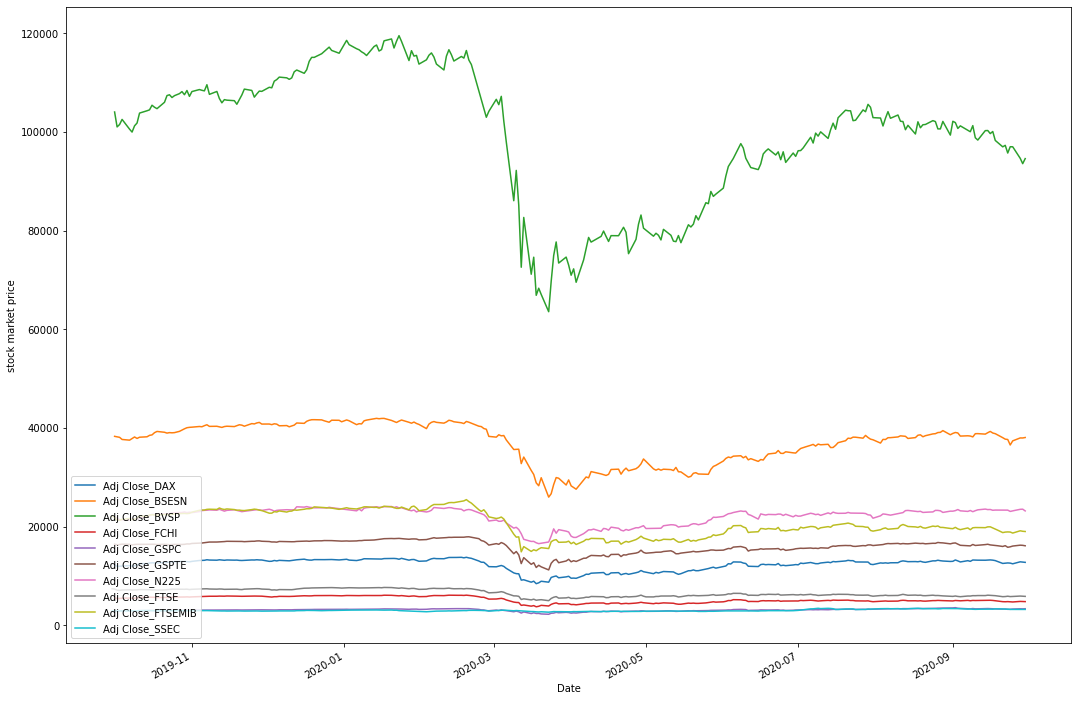

In [44]:
Indices_plot = df_combined_Indices.plot(figsize=(18,13))

Indices_plot.legend(loc=3, fontsize=10)
Indices_plot.set_ylabel('stock market price')
#combined_plot.right.combined_plot.set_ylabel('Stockmarket Index')

Indices_plot = plt.savefig('Indices_plot.png')

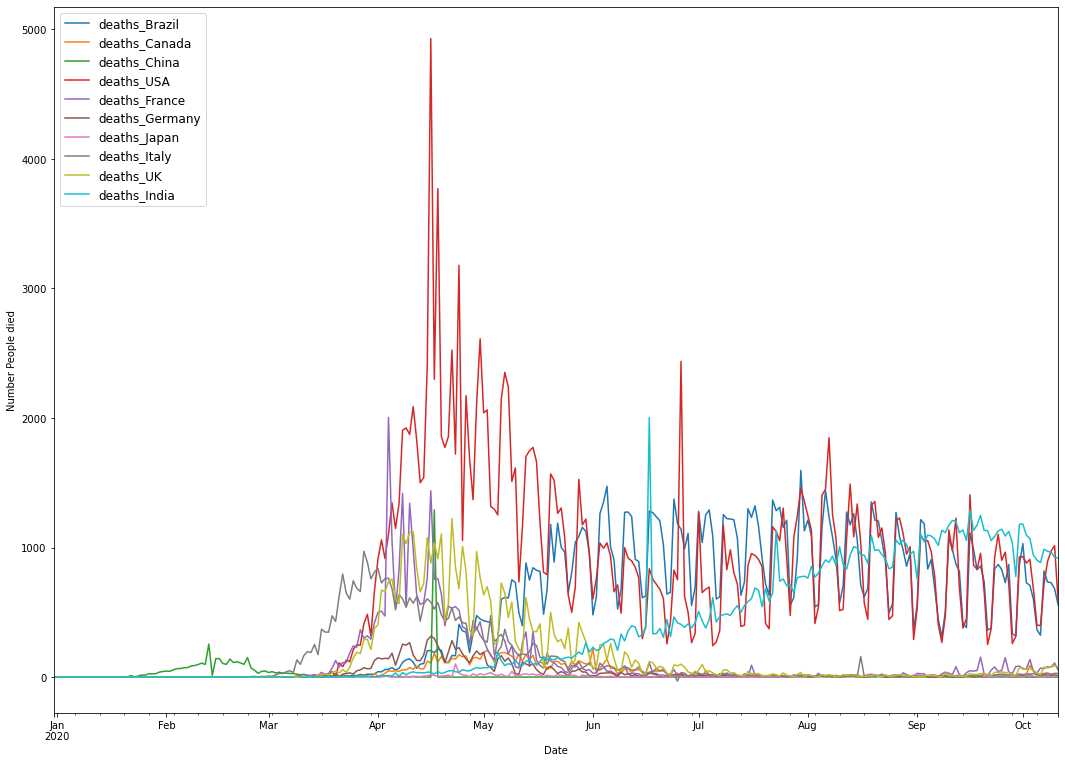

In [45]:

df_Death = df_combined_Covid[['deaths_Brazil','deaths_Canada', 'deaths_China','deaths_USA','deaths_France','deaths_Germany','deaths_Japan', 'deaths_Italy', 'deaths_UK', 'deaths_India']]
Death_plot = df_Death.plot(figsize=(18,13))

Death_plot.legend(loc=2, fontsize=12)
Death_plot.set_ylabel('Number People died')
#combined_plot.right.combined_plot.set_ylabel('Number People died')

Death_plot = plt.savefig('Death_plot.png')

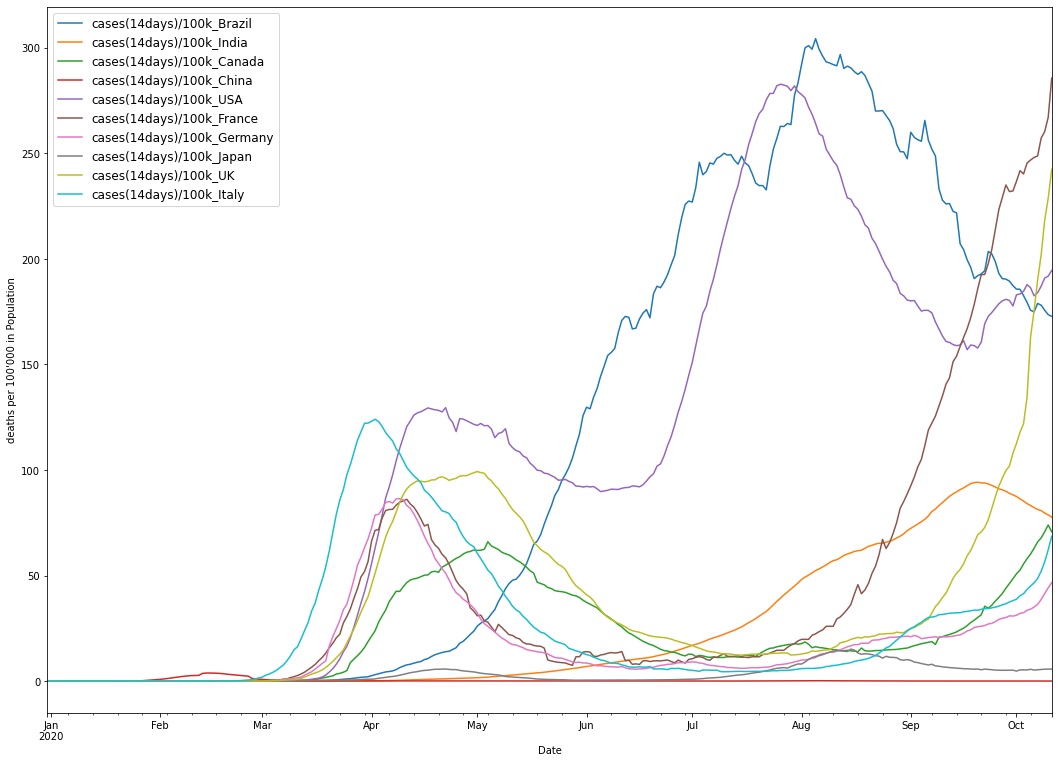

<Figure size 432x288 with 0 Axes>

In [46]:
df_cumCases = df_combined_Covid[['cases(14days)/100k_Brazil', 'cases(14days)/100k_India','cases(14days)/100k_Canada', 'cases(14days)/100k_China','cases(14days)/100k_USA','cases(14days)/100k_France','cases(14days)/100k_Germany','cases(14days)/100k_Japan', 'cases(14days)/100k_UK', 'cases(14days)/100k_Italy']]
cumCases_plot = df_cumCases.plot(figsize=(18,13))

cumCases_plot.legend(loc=2, fontsize=12)
cumCases_plot.set_ylabel('deaths per 100\'000 in Population')
#combined_plot.right.combined_plot.set_ylabel('Stockmarket Index')

plt.show()
cumCases_plot = plt.savefig('Death_plot.png')

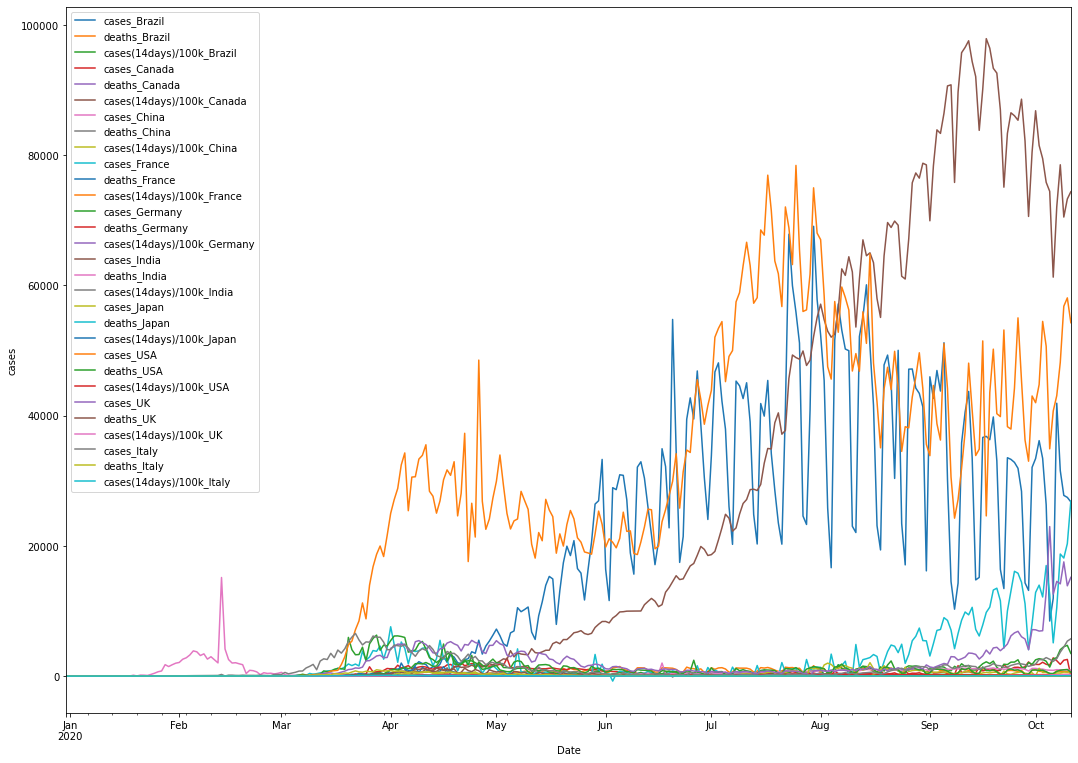

In [47]:
Covid_plot = df_combined_Covid.plot(figsize=(18,13))

Covid_plot.legend(loc=2, fontsize=10)
Covid_plot.set_ylabel('cases')
#combined_plot.right.combined_plot.set_ylabel('Stockmarket Index')

plt.show()

## Correlations, etc.

In [48]:
Correlation = df_combined.corr()  # ouput is Pearson's r !
Correlation.round(3)

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,...,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,Adj Close_FTSE,Adj Close_FTSEMIB,Adj Close_SSEC
cases_Brazil,1.000,0.909,0.898,0.051,-0.124,0.102,-0.225,-0.179,-0.312,0.274,...,0.319,0.116,0.102,-0.160,0.438,0.134,0.349,-0.297,-0.140,0.684
deaths_Brazil,0.909,1.000,0.817,0.158,0.132,0.270,-0.264,-0.191,-0.367,0.168,...,0.206,-0.069,-0.044,-0.261,0.320,0.028,0.255,-0.344,-0.255,0.509
cases(14days)/100k_Brazil,0.898,0.817,1.000,0.053,-0.204,0.078,-0.239,-0.191,-0.330,0.314,...,0.383,0.174,0.144,-0.148,0.519,0.180,0.413,-0.315,-0.124,0.810
cases_Canada,0.051,0.158,0.053,1.000,0.613,0.899,-0.246,-0.041,-0.336,0.453,...,-0.460,-0.601,-0.643,-0.616,-0.328,-0.472,-0.416,-0.572,-0.642,-0.198
deaths_Canada,-0.124,0.132,-0.204,0.613,1.000,0.764,-0.166,0.066,-0.226,-0.110,...,-0.458,-0.589,-0.565,-0.462,-0.380,-0.393,-0.426,-0.331,-0.501,-0.427
cases(14days)/100k_Canada,0.102,0.270,0.078,0.899,0.764,1.000,-0.263,-0.071,-0.359,0.420,...,-0.431,-0.616,-0.634,-0.608,-0.290,-0.430,-0.380,-0.537,-0.640,-0.220
cases_China,-0.225,-0.264,-0.239,-0.246,-0.166,-0.263,1.000,0.287,0.647,-0.152,...,0.257,0.300,0.321,0.406,0.193,0.331,0.214,0.402,0.431,-0.169
deaths_China,-0.179,-0.191,-0.191,-0.041,0.066,-0.071,0.287,1.000,0.334,-0.081,...,0.040,0.079,0.073,0.139,0.023,0.097,0.017,0.143,0.146,-0.123
cases(14days)/100k_China,-0.312,-0.367,-0.330,-0.336,-0.226,-0.359,0.647,0.334,1.000,-0.208,...,0.319,0.390,0.392,0.522,0.232,0.438,0.241,0.502,0.575,-0.148
cases_France,0.274,0.168,0.314,0.453,-0.110,0.420,-0.152,-0.081,-0.208,1.000,...,0.016,-0.017,-0.159,-0.264,0.141,-0.096,0.070,-0.394,-0.264,0.339


In [49]:
Correlation.to_excel('C:/Users/haema/Documents/DataScience/CAS_Project/Correlation.xls')

In [50]:
# for a more intuitive grasp of correlation
Correlation2 = Correlation.style.background_gradient(cmap='Greens', axis=None)
pd.set_option("display.max_rows", None, "display.max_columns", None)
Correlation2 


## Dropped approaches 

Testing alternatives for NaN in Indices (that finally have been filled artificially with method interpolate.


In [51]:
df_combined_DropNA = df_combined.dropna()

df_combined_0 = df_combined.fillna(0)

df_combined_1e20 = df_combined.fillna(1e20)

In [52]:
df_combined_DropNA.corr()

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,deaths_France,cases(14days)/100k_France,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,cases_India,deaths_India,cases(14days)/100k_India,cases_Japan,deaths_Japan,cases(14days)/100k_Japan,cases_USA,deaths_USA,cases(14days)/100k_USA,cases_UK,deaths_UK,cases(14days)/100k_UK,cases_Italy,deaths_Italy,cases(14days)/100k_Italy,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,Adj Close_FTSE,Adj Close_FTSEMIB,Adj Close_SSEC
cases_Brazil,1.000000,0.910141,0.900382,0.004603,-0.126237,0.063179,-0.223209,-0.176425,-0.309333,0.276691,-0.272721,0.218351,-0.091181,-0.278435,-0.129541,0.698410,0.779655,0.648498,0.598206,0.089718,0.593863,0.819244,0.299755,0.799527,-0.017548,-0.265026,-0.030376,-0.281788,-0.390266,-0.293252,0.316319,0.116018,0.099578,-0.161908,0.435702,0.131872,0.346670,-0.299584,-0.141944,0.683669
deaths_Brazil,0.910141,1.000000,0.818590,0.148765,0.133148,0.270500,-0.264544,-0.190229,-0.366227,0.174746,-0.213062,0.140674,-0.119604,-0.158041,-0.121809,0.542611,0.662286,0.498129,0.443929,0.186692,0.445177,0.764154,0.417861,0.749917,0.071085,-0.114761,0.123135,-0.297427,-0.331441,-0.261318,0.202047,-0.069157,-0.047404,-0.264146,0.317021,0.025171,0.251228,-0.346633,-0.257567,0.508388
cases(14days)/100k_Brazil,0.900382,0.818590,1.000000,0.002314,-0.205965,0.032453,-0.235820,-0.187414,-0.325697,0.330263,-0.314219,0.307023,-0.112461,-0.335947,-0.129195,0.810830,0.874040,0.776982,0.653447,0.071520,0.701163,0.842006,0.192487,0.879114,-0.026575,-0.337855,-0.043968,-0.298132,-0.442464,-0.313026,0.380875,0.173819,0.141423,-0.150179,0.516832,0.177681,0.410453,-0.317390,-0.126202,0.809603
cases_Canada,0.004603,0.148765,0.002314,1.000000,0.701258,0.908851,-0.255363,-0.026826,-0.348422,0.359250,0.568202,0.521338,0.514485,0.697506,0.697456,0.104603,0.086215,0.134311,0.154168,0.547364,0.212530,0.318992,0.699613,0.326324,0.873332,0.709344,0.933856,0.456013,0.500636,0.660672,-0.465717,-0.602882,-0.647607,-0.619672,-0.334109,-0.476991,-0.422345,-0.574665,-0.645621,-0.199737
deaths_Canada,-0.126237,0.133148,-0.205965,0.701258,1.000000,0.851061,-0.168642,0.065467,-0.229940,-0.119726,0.432016,-0.023520,0.136406,0.673599,0.352149,-0.300073,-0.258417,-0.298513,-0.108272,0.520849,-0.059354,0.047307,0.660437,0.070562,0.547013,0.716414,0.739017,0.184853,0.375964,0.378643,-0.462144,-0.589539,-0.567719,-0.463338,-0.383982,-0.395576,-0.429565,-0.332722,-0.502666,-0.428893
cases(14days)/100k_Canada,0.063179,0.270500,0.032453,0.908851,0.851061,1.000000,-0.266063,-0.060256,-0.362934,0.242464,0.508415,0.383949,0.324741,0.689862,0.571993,0.048028,0.063042,0.063129,0.126254,0.574664,0.189988,0.312786,0.774516,0.345492,0.811002,0.723868,0.951855,0.300581,0.391402,0.522358,-0.436588,-0.617323,-0.638828,-0.611414,-0.296205,-0.434394,-0.385956,-0.539846,-0.643394,-0.222024
cases_China,-0.223209,-0.264544,-0.235820,-0.255363,-0.168642,-0.266063,1.000000,0.285577,0.645866,-0.162567,-0.110291,-0.176934,-0.183254,-0.131726,-0.195552,-0.177185,-0.203078,-0.171018,-0.164865,-0.158636,-0.186427,-0.290611,-0.251687,-0.284462,-0.236230,-0.139452,-0.245037,-0.182502,-0.141774,-0.186424,0.256869,0.300205,0.320304,0.405502,0.192809,0.330695,0.213037,0.401444,0.431246,-0.169871
deaths_China,-0.176425,-0.190229,-0.187414,-0.026826,0.065467,-0.060256,0.285577,1.000000,0.332347,-0.075100,0.081465,-0.055552,0.001686,0.157296,0.023126,-0.141100,-0.161276,-0.135675,-0.057243,-0.046963,-0.079400,-0.155001,-0.024492,-0.152970,-0.016691,0.104179,-0.026165,0.018387,0.033951,0.014432,0.040206,0.079088,0.073373,0.139519,0.023206,0.097214,0.017515,0.142785,0.146323,-0.122944
cases(14days)/100k_China,-0.309333,-0.366227,-0.325697,-0.348422,-0.229940,-0.362934,0.645866,0.332347,1.000000,-0.221106,-0.148464,-0.240834,-0.251549,-0.177736,-0.266010,-0.242433,-0.27934

In [53]:
df_combined_0.corr()

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,deaths_France,cases(14days)/100k_France,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,cases_India,deaths_India,cases(14days)/100k_India,cases_Japan,deaths_Japan,cases(14days)/100k_Japan,cases_USA,deaths_USA,cases(14days)/100k_USA,cases_UK,deaths_UK,cases(14days)/100k_UK,cases_Italy,deaths_Italy,cases(14days)/100k_Italy,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,Adj Close_FTSE,Adj Close_FTSEMIB,Adj Close_SSEC
cases_Brazil,1.000000,0.923047,0.913547,0.195524,-0.005850,0.245542,-0.159167,-0.130352,-0.219453,0.343617,-0.169029,0.318214,0.084648,-0.164370,0.044043,0.727596,0.803704,0.677330,0.646717,0.186235,0.648853,0.846203,0.413266,0.831115,0.160851,-0.147294,0.173294,-0.078497,-0.256691,-0.108096,-0.016014,-0.123249,-0.117525,-0.265828,0.060525,-0.102060,-0.022965,-0.344541,-0.275397,0.115751
deaths_Brazil,0.923047,1.000000,0.848511,0.301230,0.231094,0.400921,-0.184504,-0.134143,-0.253959,0.257014,-0.102258,0.247971,0.064797,-0.042033,0.059811,0.593264,0.703002,0.547148,0.514897,0.278060,0.527138,0.806520,0.523777,0.796993,0.188684,0.000778,0.256578,-0.085912,-0.184701,-0.068777,-0.033181,-0.173405,-0.167511,-0.284169,0.056068,-0.107059,-0.022592,-0.339197,-0.306046,0.103053
cases(14days)/100k_Brazil,0.913547,0.848511,1.000000,0.205052,-0.070086,0.233146,-0.167263,-0.137927,-0.229665,0.381578,-0.201509,0.386906,0.072208,-0.210177,0.052987,0.822783,0.883818,0.785754,0.694629,0.172670,0.744679,0.869295,0.328707,0.900730,0.181236,-0.206627,0.176894,-0.083254,-0.296383,-0.115940,0.001247,-0.109215,-0.106308,-0.271777,0.082740,-0.094845,-0.010258,-0.363697,-0.279482,0.147296
cases_Canada,0.195524,0.301230,0.205052,1.000000,0.648644,0.915352,-0.175516,-0.002256,-0.237896,0.503860,0.518535,0.653057,0.608897,0.614110,0.721306,0.315586,0.305481,0.353745,0.279734,0.534442,0.335816,0.478596,0.683457,0.476512,0.777651,0.626746,0.887231,0.546900,0.453688,0.677445,-0.553817,-0.627428,-0.672916,-0.652389,-0.451496,-0.544384,-0.517134,-0.662590,-0.702044,-0.416151
deaths_Canada,-0.005850,0.231094,-0.070086,0.648644,1.000000,0.780960,-0.125385,0.087065,-0.169235,-0.032999,0.461226,0.044347,0.198851,0.690627,0.399824,-0.177871,-0.129795,-0.176718,-0.010899,0.556149,0.038407,0.167695,0.688255,0.184830,0.343079,0.731274,0.567214,0.236326,0.416467,0.423296,-0.227473,-0.306400,-0.351333,-0.270671,-0.132315,-0.172799,-0.173881,-0.221151,-0.321428,-0.119463
cases(14days)/100k_Canada,0.245542,0.400921,0.233146,0.915352,0.780960,1.000000,-0.186419,-0.027986,-0.252476,0.476256,0.485098,0.576073,0.481918,0.628067,0.648154,0.276934,0.290019,0.301273,0.270793,0.570072,0.328572,0.488908,0.759938,0.503799,0.766962,0.660425,0.925079,0.460809,0.383727,0.594193,-0.533968,-0.627428,-0.666406,-0.645744,-0.424684,-0.520391,-0.494473,-0.645986,-0.699145,-0.405142
cases_China,-0.159167,-0.184504,-0.167263,-0.175516,-0.125385,-0.186419,1.000000,0.294468,0.653592,-0.114269,-0.080972,-0.126611,-0.135266,-0.095405,-0.144219,-0.133812,-0.149629,-0.130089,-0.118414,-0.117596,-0.135166,-0.196056,-0.175641,-0.193003,-0.130859,-0.101599,-0.157307,-0.135504,-0.100582,-0.138557,0.138267,0.150494,0.186048,0.188909,0.118004,0.153231,0.106930,0.173912,0.220202,-0.009980
deaths_China,-0.130352,-0.134143,-0.137927,-0.002256,0.087065,-0.027986,0.294468,1.000000,0.342900,-0.054995,0.097994,-0.040639,0.020046,0.174523,0.044686,-0.110270,-0.123005,-0.106649,-0.029544,-0.021339,-0.047720,-0.096974,0.013815,-0.096279,-0.012705,0.123619,-0.011708,0.034936,0.058141,0.037094,0.036143,0.047869,0.048894,0.068210,0.041563,0.057758,0.028235,0.063220,0.076678,-0.004831
cases(14days)/100k_China,-0.219453,-0.253959,-0.229665,-0.237896,-0.169235,-0.252476,0.653592,0.342900,1.000000,-0.154913,-0.107359,-0.171688,-0.184576,-0.126870,-0.194390,-0.181872,-0.204561,

In [54]:
df_combined_1e20.corr()

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,deaths_France,cases(14days)/100k_France,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,cases_India,deaths_India,cases(14days)/100k_India,cases_Japan,deaths_Japan,cases(14days)/100k_Japan,cases_USA,deaths_USA,cases(14days)/100k_USA,cases_UK,deaths_UK,cases(14days)/100k_UK,cases_Italy,deaths_Italy,cases(14days)/100k_Italy,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,Adj Close_FTSE,Adj Close_FTSEMIB,Adj Close_SSEC
cases_Brazil,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990883,0.990883,0.990883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.086804,-0.086804,-0.086804
deaths_Brazil,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990883,0.990883,0.990883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.086804,-0.086804,-0.086804
cases(14days)/100k_Brazil,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990883,0.990883,0.990883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.086804,-0.086804,-0.086804
cases_Canada,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990883,0.990883,0.990883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.086804,-0.086804,-0.086804
deaths_Canada,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990883,0.990883,0.990883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.086804,-0.086804,-0.086804
cases(14days)/100k_Canada,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990883,0.990883,0.990883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.086804,-0.086804,-0.086804
cases_China,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990883,0.990883,0.990883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.086804,-0.086804,-0.086804
deaths_China,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990883,0.990883,0.990883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.050932,-0.086804,-0.086804,-0.086804
cases(14days)/100k_China,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990883,0.990883,0.990883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [55]:
AdjClose=df_combined['Adj Close_DAX']
Cases  = df_combined['cases_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose,Cases)
print (slope, intercept, std_err)

nan nan nan


C:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [56]:
AdjClose=df_combined_DropNA['Adj Close_DAX']
Cases  = df_combined_DropNA['cases_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose,Cases)
print (slope, intercept, std_err, p_value)

-0.6237275060945794 8606.389715009027 0.049953552659532253 1.3773905779793955e-28


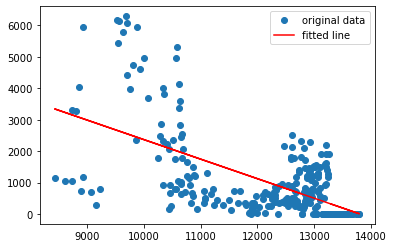

In [57]:
plt.plot(AdjClose, Cases, 'o', label='original data')

plt.plot(AdjClose, intercept + slope*AdjClose, 'r', label='fitted line')

plt.legend()

plt.show()

In [58]:
AdjClose=df_combined_1e20['Adj Close_DAX']
Cases  = df_combined_1e20['cases_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose,Cases)
print (slope, intercept, std_err)

-0.11021505376344068 1.935483870967742e+19 0.11535462899150707


In [59]:
AdjClose=df_combined_0['Adj Close_DAX']
Cases  = df_combined_0['cases_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose,Cases)
print (slope, intercept, std_err)

-0.2731020503719528 4150.956751682724 0.024006224435102756


In [60]:
covariance = cov(df_combined['deaths_Brazil'], df_combined['cases_Brazil'])
covariance

array([[nan, nan],
       [nan, nan]])

In [61]:
covariance_DropNA = cov(df_combined_DropNA['deaths_Brazil'], df_combined_DropNA['cases_Brazil'])
covariance_DropNA

array([[2.38020700e+05, 8.33118690e+06],
       [8.33118690e+06, 3.52031973e+08]])

In [62]:
covariance_0 = cov(df_combined_0['deaths_Brazil'], df_combined['cases_Brazil'])
covariance_0

array([[229630.59152073,             nan],
       [            nan,             nan]])

In [63]:
df_combined_DropNA.corr()

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,deaths_France,cases(14days)/100k_France,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,cases_India,deaths_India,cases(14days)/100k_India,cases_Japan,deaths_Japan,cases(14days)/100k_Japan,cases_USA,deaths_USA,cases(14days)/100k_USA,cases_UK,deaths_UK,cases(14days)/100k_UK,cases_Italy,deaths_Italy,cases(14days)/100k_Italy,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,Adj Close_FTSE,Adj Close_FTSEMIB,Adj Close_SSEC
cases_Brazil,1.000000,0.910141,0.900382,0.004603,-0.126237,0.063179,-0.223209,-0.176425,-0.309333,0.276691,-0.272721,0.218351,-0.091181,-0.278435,-0.129541,0.698410,0.779655,0.648498,0.598206,0.089718,0.593863,0.819244,0.299755,0.799527,-0.017548,-0.265026,-0.030376,-0.281788,-0.390266,-0.293252,0.316319,0.116018,0.099578,-0.161908,0.435702,0.131872,0.346670,-0.299584,-0.141944,0.683669
deaths_Brazil,0.910141,1.000000,0.818590,0.148765,0.133148,0.270500,-0.264544,-0.190229,-0.366227,0.174746,-0.213062,0.140674,-0.119604,-0.158041,-0.121809,0.542611,0.662286,0.498129,0.443929,0.186692,0.445177,0.764154,0.417861,0.749917,0.071085,-0.114761,0.123135,-0.297427,-0.331441,-0.261318,0.202047,-0.069157,-0.047404,-0.264146,0.317021,0.025171,0.251228,-0.346633,-0.257567,0.508388
cases(14days)/100k_Brazil,0.900382,0.818590,1.000000,0.002314,-0.205965,0.032453,-0.235820,-0.187414,-0.325697,0.330263,-0.314219,0.307023,-0.112461,-0.335947,-0.129195,0.810830,0.874040,0.776982,0.653447,0.071520,0.701163,0.842006,0.192487,0.879114,-0.026575,-0.337855,-0.043968,-0.298132,-0.442464,-0.313026,0.380875,0.173819,0.141423,-0.150179,0.516832,0.177681,0.410453,-0.317390,-0.126202,0.809603
cases_Canada,0.004603,0.148765,0.002314,1.000000,0.701258,0.908851,-0.255363,-0.026826,-0.348422,0.359250,0.568202,0.521338,0.514485,0.697506,0.697456,0.104603,0.086215,0.134311,0.154168,0.547364,0.212530,0.318992,0.699613,0.326324,0.873332,0.709344,0.933856,0.456013,0.500636,0.660672,-0.465717,-0.602882,-0.647607,-0.619672,-0.334109,-0.476991,-0.422345,-0.574665,-0.645621,-0.199737
deaths_Canada,-0.126237,0.133148,-0.205965,0.701258,1.000000,0.851061,-0.168642,0.065467,-0.229940,-0.119726,0.432016,-0.023520,0.136406,0.673599,0.352149,-0.300073,-0.258417,-0.298513,-0.108272,0.520849,-0.059354,0.047307,0.660437,0.070562,0.547013,0.716414,0.739017,0.184853,0.375964,0.378643,-0.462144,-0.589539,-0.567719,-0.463338,-0.383982,-0.395576,-0.429565,-0.332722,-0.502666,-0.428893
cases(14days)/100k_Canada,0.063179,0.270500,0.032453,0.908851,0.851061,1.000000,-0.266063,-0.060256,-0.362934,0.242464,0.508415,0.383949,0.324741,0.689862,0.571993,0.048028,0.063042,0.063129,0.126254,0.574664,0.189988,0.312786,0.774516,0.345492,0.811002,0.723868,0.951855,0.300581,0.391402,0.522358,-0.436588,-0.617323,-0.638828,-0.611414,-0.296205,-0.434394,-0.385956,-0.539846,-0.643394,-0.222024
cases_China,-0.223209,-0.264544,-0.235820,-0.255363,-0.168642,-0.266063,1.000000,0.285577,0.645866,-0.162567,-0.110291,-0.176934,-0.183254,-0.131726,-0.195552,-0.177185,-0.203078,-0.171018,-0.164865,-0.158636,-0.186427,-0.290611,-0.251687,-0.284462,-0.236230,-0.139452,-0.245037,-0.182502,-0.141774,-0.186424,0.256869,0.300205,0.320304,0.405502,0.192809,0.330695,0.213037,0.401444,0.431246,-0.169871
deaths_China,-0.176425,-0.190229,-0.187414,-0.026826,0.065467,-0.060256,0.285577,1.000000,0.332347,-0.075100,0.081465,-0.055552,0.001686,0.157296,0.023126,-0.141100,-0.161276,-0.135675,-0.057243,-0.046963,-0.079400,-0.155001,-0.024492,-0.152970,-0.016691,0.104179,-0.026165,0.018387,0.033951,0.014432,0.040206,0.079088,0.073373,0.139519,0.023206,0.097214,0.017515,0.142785,0.146323,-0.122944
cases(14days)/100k_China,-0.309333,-0.366227,-0.325697,-0.348422,-0.229940,-0.362934,0.645866,0.332347,1.000000,-0.221106,-0.148464,-0.240834,-0.251549,-0.177736,-0.266010,-0.242433,-0.27934

In [64]:
covariance_1e20 = cov(df_combined_1e20['deaths_Brazil'], df_combined['cases_Brazil'])
covariance_1e20

array([[1.54213881e+39,            nan],
       [           nan,            nan]])

In [65]:
x_values = df_combined['cases(14days)/100k_Germany']

y_values = df_combined['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

nan


In [66]:
x_values = df_combined_DropNA['cases(14days)/100k_Germany']

y_values = df_combined_DropNA['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

0.31962798691347566


In [67]:
x_values = df_combined_0['cases(14days)/100k_Germany']

y_values = df_combined_0['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2

print(r_squared)

0.1921240223666201


In [68]:
x_values = df_combined_1e20['cases(14days)/100k_Germany']

y_values = df_combined_1e20['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

0.002594039726923687


##  Proof-of-Concept: Example Germany

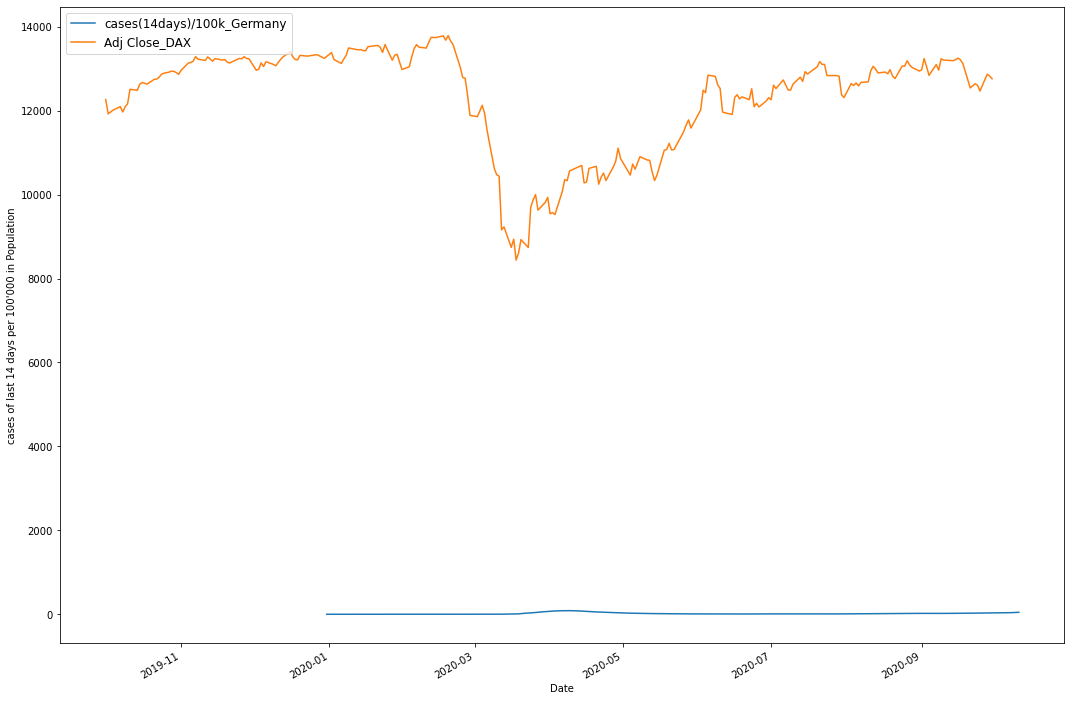

In [69]:
df_Germany_Overview = df_combined[['cases(14days)/100k_Germany','Adj Close_DAX']]
Germany_Overview_plot = df_Germany_Overview.plot(figsize=(18,13))

Germany_Overview_plot.legend(loc=2, fontsize=12)
Germany_Overview_plot.set_ylabel('cases of last 14 days per 100\'000 in Population')
#Germany_Overview_plot.right.combined_plot.set_ylabel('Stockmarket Index')

plt.show()

In [70]:
df_Covid_Germany

,Date,cases_Germany,deaths_Germany,cases(14days)/100k_Germany
17144,2020-10-11,3483,11,46.644624
17145,2020-10-10,4721,15,44.147612
17146,2020-10-09,4516,11,41.480759
17147,2020-10-08,4058,16,38.634430
17148,2020-10-07,2828,16,36.327735
17149,2020-10-06,2639,12,35.052127
17150,2020-10-05,1382,5,34.066813
17151,2020-10-04,2279,2,33.512724
17152,2020-10-03,2563,19,32.387684
17153,2020-10-02,2673,8,32.067276


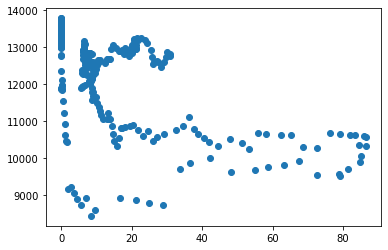

In [71]:
#df_combined['deaths_Brazil'].plot()
#df_combined['Adj Close_BVSP'].plot()
#df_combined['Volume_BVSP'].plot()
#plt.show()



plt.scatter(df_combined['cases(14days)/100k_Germany'], df_combined['Adj Close_DAX'])


plt.show()

In [72]:
#df_Covid_Germany.fillna(0)
##df_Covid_Germany.fillna(0)
#df_DAX

df_Germany = pd.merge(df_Covid_Germany, df_DAX, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_Germany.sort_index()
df_Germany.head(3)

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2020-10-11,3483.0,11.0,46.644624,NaN
2020-10-10,4721.0,15.0,44.147612,NaN
2020-10-09,4516.0,11.0,41.480759,NaN


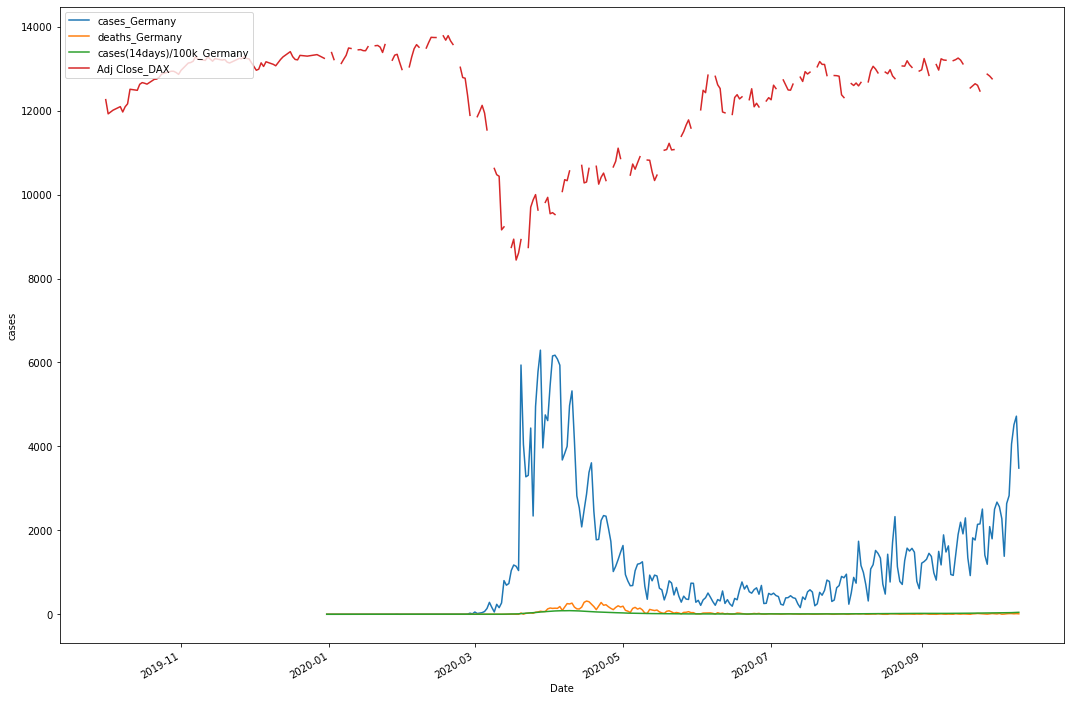

In [73]:

Germany_plot = df_Germany.plot(figsize=(18,13))

Germany_plot.legend(loc=2, fontsize=10)
Germany_plot.set_ylabel('cases')
#combined_plot.right.combined_plot.set_ylabel('Stockmarket Index')

plt.show()

In [74]:
#### Einschub USA
#df_USA_Overview = df_combined[['cases(14days)/100k_USA','Adj Close_GSPC']]
#USA_Overview_plot = df_USA_Overview.plot(figsize=(18,13))

#USA_Overview_plot.legend(loc=2, fontsize=12)
#USA_Overview_plot.set_ylabel('cases of last 14 days per 100\'000 in Population')


#plt.show()

In [75]:
print(df_Covid_Germany.head(3))
print(df_DAX.head(3))
print(df_Germany.head(3))

            Date  cases_Germany  deaths_Germany  cases(14days)/100k_Germany
17144 2020-10-11           3483              11                   46.644624
17145 2020-10-10           4721              15                   44.147612
17146 2020-10-09           4516              11                   41.480759
        Date  Adj Close_DAX
0 2019-10-01   12263.830078
1 2019-10-02   11925.250000
2 2019-10-04   12012.809570
            cases_Germany  deaths_Germany  cases(14days)/100k_Germany  \
Date                                                                    
2020-10-11         3483.0            11.0                   46.644624   
2020-10-10         4721.0            15.0                   44.147612   
2020-10-09         4516.0            11.0                   41.480759   

            Adj Close_DAX  
Date                       
2020-10-11            NaN  
2020-10-10            NaN  
2020-10-09            NaN  


In [76]:
df_Germany_DropNA= df_Germany.dropna()
df_Germany_DropNA.sort_index()

df_Germany_0= df_Germany.fillna(0)
df_Germany_0.sort_index()

df_Germany_1e20 = df_Germany.fillna(1e20)
df_Germany_DropNA.sort_index()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2020-01-02,0.0,0.0,0.000000,13385.929688
2020-01-03,0.0,0.0,0.000000,13219.139648
2020-01-06,0.0,0.0,0.000000,13126.990234
2020-01-07,0.0,0.0,0.000000,13226.830078
2020-01-08,0.0,0.0,0.000000,13320.179688
2020-01-09,0.0,0.0,0.000000,13495.059570
2020-01-10,0.0,0.0,0.000000,13483.309570
2020-01-13,0.0,0.0,0.000000,13451.519531
2020-01-14,0.0,0.0,0.000000,13456.490234


In [77]:
df_Germany_0 # note: last two columns are very close in absolute numbers.

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2020-10-11,3483.0,11.0,46.644624,0.000000
2020-10-10,4721.0,15.0,44.147612,0.000000
2020-10-09,4516.0,11.0,41.480759,0.000000
2020-10-08,4058.0,16.0,38.634430,0.000000
2020-10-07,2828.0,16.0,36.327735,0.000000
2020-10-06,2639.0,12.0,35.052127,0.000000
2020-10-05,1382.0,5.0,34.066813,0.000000
2020-10-04,2279.0,2.0,33.512724,0.000000
2020-10-03,2563.0,19.0,32.387684,0.000000


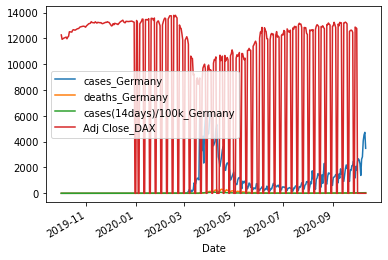

In [78]:
df_Germany_0.plot()

In [79]:
#df_Germany_0.cov()

In [80]:
df_Germany_adj = df_Germany
df_Germany_cases = df_Germany_adj.pop('cases_Germany')

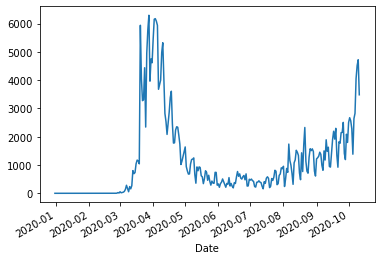

In [81]:
df_Germany_cases.plot()

Text(0, 0.5, 'Cases')

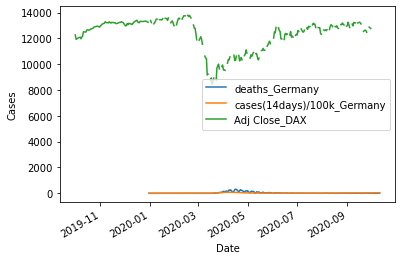

In [82]:
plot_Germany = df_Germany.plot()
plot_Germany.set_xlabel("Date")
plot_Germany.set_ylabel("Cases")

In [83]:
df_Germany.corr()

,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
deaths_Germany,1.000000,0.762902,-0.566141
cases(14days)/100k_Germany,0.762902,1.000000,-0.552733
Adj Close_DAX,-0.566141,-0.552733,1.000000


In [84]:
df_Germany_DropNA.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.539597,0.845827,-0.579563
deaths_Germany,0.539597,1.000000,0.778017,-0.566141
cases(14days)/100k_Germany,0.845827,0.778017,1.000000,-0.552733
Adj Close_DAX,-0.579563,-0.566141,-0.552733,1.000000


In [85]:
x_values = df_Germany['cases(14days)/100k_Germany']

y_values = df_Germany['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

nan


In [86]:
df_Germany_DropNA.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.539597,0.845827,-0.579563
deaths_Germany,0.539597,1.000000,0.778017,-0.566141
cases(14days)/100k_Germany,0.845827,0.778017,1.000000,-0.552733
Adj Close_DAX,-0.579563,-0.566141,-0.552733,1.000000


In [87]:
x_values = df_Germany_DropNA['Adj Close_DAX']

y_values = df_Germany_DropNA['cases(14days)/100k_Germany']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

0.30551380140576656


### Germany - by month

In [88]:
df_Germany_DropNA.sort_index()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2020-01-02,0.0,0.0,0.000000,13385.929688
2020-01-03,0.0,0.0,0.000000,13219.139648
2020-01-06,0.0,0.0,0.000000,13126.990234
2020-01-07,0.0,0.0,0.000000,13226.830078
2020-01-08,0.0,0.0,0.000000,13320.179688
2020-01-09,0.0,0.0,0.000000,13495.059570
2020-01-10,0.0,0.0,0.000000,13483.309570
2020-01-13,0.0,0.0,0.000000,13451.519531
2020-01-14,0.0,0.0,0.000000,13456.490234


In [89]:
df_Germany.sort_index()

,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,
2019-10-01,NaN,NaN,12263.830078
2019-10-02,NaN,NaN,11925.250000
2019-10-04,NaN,NaN,12012.809570
2019-10-07,NaN,NaN,12097.429688
2019-10-08,NaN,NaN,11970.200195
2019-10-09,NaN,NaN,12094.259766
2019-10-10,NaN,NaN,12164.200195
2019-10-11,NaN,NaN,12511.650391
2019-10-14,NaN,NaN,12486.559570


In [90]:
df_Germany.corr()

,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
deaths_Germany,1.000000,0.762902,-0.566141
cases(14days)/100k_Germany,0.762902,1.000000,-0.552733
Adj Close_DAX,-0.566141,-0.552733,1.000000


In [91]:
df_Germany_DropNA.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.539597,0.845827,-0.579563
deaths_Germany,0.539597,1.000000,0.778017,-0.566141
cases(14days)/100k_Germany,0.845827,0.778017,1.000000,-0.552733
Adj Close_DAX,-0.579563,-0.566141,-0.552733,1.000000


In [92]:
subset_Germany_sep2020 = df_Germany.sort_index()[0:24]
subset_Germany_aug2020 = df_Germany[24:54]
subset_Germany_juli2020 = df_Germany[54:85]
subset_Germany_juni2020 = df_Germany[85:115]
subset_Germany_mai2020 = df_Germany[115:146]
subset_Germany_april2020 = df_Germany[146:176]
subset_Germany_märz2020 = df_Germany[176:207]
subset_Germany_feb2020 = df_Germany[207:236]
subset_Germany_jan2020 = df_Germany[236:267]
subset_Germany_dez2019 = df_Germany[267:298]


In [93]:
subset_Germany_dez2019.corr()

,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
deaths_Germany,NaN,NaN,NaN
cases(14days)/100k_Germany,NaN,NaN,NaN
Adj Close_DAX,NaN,NaN,1.0


In [94]:
subset_Germany_sep2020.corr()

,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
deaths_Germany,NaN,NaN,NaN
cases(14days)/100k_Germany,NaN,NaN,NaN
Adj Close_DAX,NaN,NaN,1.0


In [95]:
subset_Germany_april2020 = df_Germany[146:176]

In [96]:
subset_Germany_april2020

,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,
2020-05-18,21.0,13.878715,11058.870117
2020-05-17,33.0,14.284645,NaN
2020-05-16,57.0,14.537599,NaN
2020-05-15,101.0,14.929074,10465.169922
2020-05-14,89.0,15.803571,10337.019531
2020-05-13,101.0,16.460045,10542.660156
2020-05-12,116.0,17.069543,10819.500000
2020-05-11,22.0,17.323701,10824.990234
2020-05-10,26.0,18.119902,NaN


In [97]:
df_Germany_DropNA.head(3)

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2020-09-30,1798.0,17.0,30.783236,12760.730469
2020-09-29,2089.0,11.0,30.907303,12825.820313
2020-09-28,1192.0,3.0,30.085807,12870.870117


In [98]:
df_Germany_DropNA.sort_index()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2020-01-02,0.0,0.0,0.000000,13385.929688
2020-01-03,0.0,0.0,0.000000,13219.139648
2020-01-06,0.0,0.0,0.000000,13126.990234
2020-01-07,0.0,0.0,0.000000,13226.830078
2020-01-08,0.0,0.0,0.000000,13320.179688
2020-01-09,0.0,0.0,0.000000,13495.059570
2020-01-10,0.0,0.0,0.000000,13483.309570
2020-01-13,0.0,0.0,0.000000,13451.519531
2020-01-14,0.0,0.0,0.000000,13456.490234


In [99]:
df_Germany_DropNA_1=df_Germany_DropNA[0:30]
df_Germany_DropNA_2=df_Germany_DropNA[30:60]
df_Germany_DropNA_3=df_Germany_DropNA[60:90]
df_Germany_DropNA_4=df_Germany_DropNA[90:120]
df_Germany_DropNA_5=df_Germany_DropNA[120:150]
df_Germany_DropNA_6=df_Germany_DropNA[150:180]


In [100]:
df_Germany_DropNA_1 # August-September

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2020-09-30,1798.0,17.0,30.783236,12760.730469
2020-09-29,2089.0,11.0,30.907303,12825.820313
2020-09-28,1192.0,3.0,30.085807,12870.870117
2020-09-25,2153.0,15.0,28.153724,12469.200195
2020-09-24,2143.0,19.0,27.347886,12606.570313
2020-09-23,1769.0,13.0,27.045547,12642.969727
2020-09-22,1821.0,10.0,26.331254,12594.389648
2020-09-21,922.0,0.0,25.943392,12542.440430
2020-09-18,1916.0,7.0,24.276308,13116.250000


In [101]:
df_Germany_DropNA_1.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.526716,0.337473,-0.276022
deaths_Germany,0.526716,1.000000,0.509168,-0.432294
cases(14days)/100k_Germany,0.337473,0.509168,1.000000,-0.563041
Adj Close_DAX,-0.276022,-0.432294,-0.563041,1.000000


In [102]:
AdjClose1=df_Germany_DropNA_1['Adj Close_DAX']
Cases1  = df_Germany_DropNA_1['cases(14days)/100k_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose1, Cases1)
print (slope, intercept, std_err, r_value)

#covariance = cov(df_Germany_DropNA_1['cases(14days)/100k_Germany'], df_Germany_DropNA_1['Adj Close_DAX'])

-0.008607514470419375 134.64572156530605 0.0023876130478777137 -0.5630412753071793


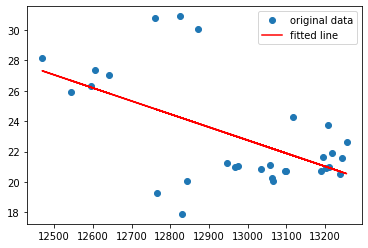

In [103]:
plt.plot(AdjClose1, Cases1, 'o', label='original data')

plt.plot(AdjClose1, intercept + slope*AdjClose1, 'r', label='fitted line')

plt.legend()

plt.show()

In [104]:
df_Germany_DropNA_2.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.312671,0.652489,-0.070916
deaths_Germany,0.312671,1.000000,0.091941,-0.273784
cases(14days)/100k_Germany,0.652489,0.091941,1.000000,0.060312
Adj Close_DAX,-0.070916,-0.273784,0.060312,1.000000


In [105]:
AdjClose2=df_Germany_DropNA_2['Adj Close_DAX']
Cases2  = df_Germany_DropNA_2['cases(14days)/100k_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose2, Cases2)
print (slope, intercept, std_err, r_value)


0.0011490775315894514 -4.506556811506691 0.0035939739153740685 0.06031204770635941


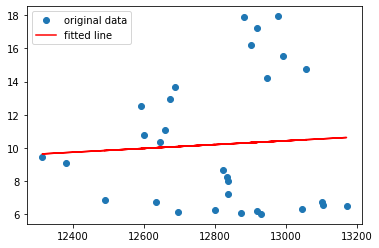

In [106]:
plt.plot(AdjClose2, Cases2, 'o', label='original data')

plt.plot(AdjClose2, intercept + slope*AdjClose2, 'r', label='fitted line')

plt.legend()

plt.show()

In [107]:
df_Germany_DropNA_3.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.178554,0.160524,-0.167317
deaths_Germany,0.178554,1.000000,0.223398,-0.384066
cases(14days)/100k_Germany,0.160524,0.223398,1.000000,-0.275121
Adj Close_DAX,-0.167317,-0.384066,-0.275121,1.000000


In [108]:
AdjClose3=df_Germany_DropNA_3['Adj Close_DAX']
Cases3  = df_Germany_DropNA_3['cases(14days)/100k_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose3, Cases3)
print (slope, intercept, std_err, r_value)


-0.0009583704024692526 19.325981092096832 0.0006329046617141036 -0.2751214681572994


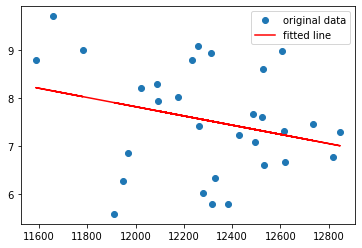

In [109]:
plt.plot(AdjClose3, Cases3, 'o', label='original data')

plt.plot(AdjClose3, intercept + slope*AdjClose3, 'r', label='fitted line')

plt.legend()

plt.show()

In [110]:
df_Germany_DropNA_4.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.922466,0.895510,-0.612596
deaths_Germany,0.922466,1.000000,0.817840,-0.611256
cases(14days)/100k_Germany,0.895510,0.817840,1.000000,-0.589198
Adj Close_DAX,-0.612596,-0.611256,-0.589198,1.000000


In [111]:
AdjClose4=df_Germany_DropNA_4['Adj Close_DAX']
Cases4  = df_Germany_DropNA_4['cases(14days)/100k_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose4, Cases4)
print (slope, intercept, std_err, r_value)


-0.03633064103992588 422.60188328730356 0.009415375692320956 -0.5891983603731675


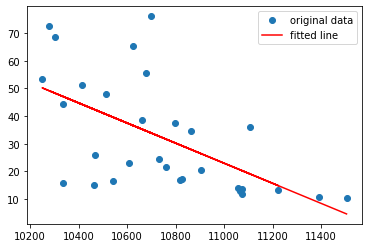

In [112]:
plt.plot(AdjClose4, Cases4, 'o', label='original data')

plt.plot(AdjClose4, intercept + slope*AdjClose4, 'r', label='fitted line')

plt.legend()

plt.show()

In [113]:
df_Germany_DropNA_5.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.700737,0.835498,-0.408120
deaths_Germany,0.700737,1.000000,0.912549,-0.071232
cases(14days)/100k_Germany,0.835498,0.912549,1.000000,-0.200004
Adj Close_DAX,-0.408120,-0.071232,-0.200004,1.000000


In [114]:
AdjClose5=df_Germany_DropNA_5['Adj Close_DAX']
Cases5  = df_Germany_DropNA_5['cases(14days)/100k_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose5, Cases5)
print (slope, intercept, std_err, r_value)


-0.0061939222099533925 94.11719022048369 0.005734347866794259 -0.20000367675715558


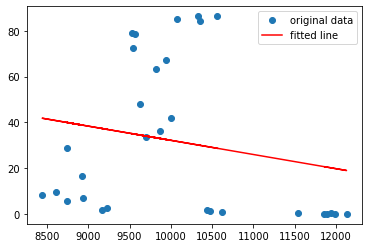

In [115]:
plt.plot(AdjClose5, Cases5, 'o', label='original data')

plt.plot(AdjClose5, intercept + slope*AdjClose5, 'r', label='fitted line')

plt.legend()

plt.show()

In [116]:
#Germany_Idea 
#Adj_Closes= [AdjClose1, AdjClose2, AdjClose3, AdjClose4, AdjClose5]
#Cases = [Cases1, Cases2, Cases3, Cases4, Cases5]
#slope, intercept, r_value, p_value, std_err = stats.linregress(Adj_Closes, Cases)
#print (slope, intercept, std_err)


In [117]:
#df_Covid_Germany = df_Covid19[df_Covid19['countriesAndTerritories'].isin(['Germany'])]
#pd.set_option('display.max_rows', None)
#df_Covid_Germany